In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

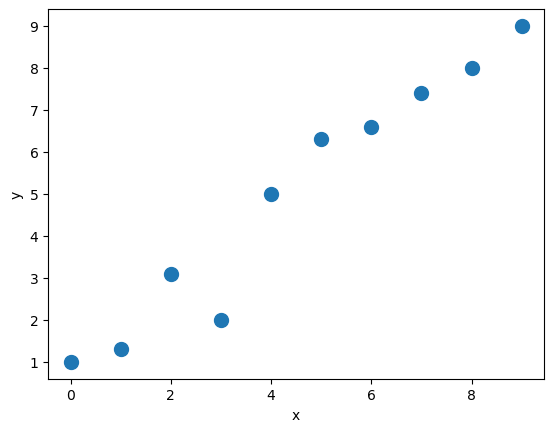

In [2]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# 표준화 이후 dataset 만듦
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
ds_train_orig = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32),
     tf.cast(y_train, tf.float32)))

In [7]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')
    
    def call(self, x):
        return self.w * x + self.b

In [8]:
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [10]:
tf.random.set_seed(1)
num_epochs = 200
log_steps = 100
learning_rate = 0.1
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))
ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)
Ws, bs = [], []
for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    bx, by = batch
    loss_val = loss_fn(model(bx), by)
    train(model, bx, by, learning_rate=learning_rate)
    if i % log_steps == 0:
        print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(
            int(i/steps_per_epoch), i, loss_val))


Epoch    0 Step  0 Loss 43.5600
Epoch   10 Step 100 Loss 0.2115
Epoch   20 Step 200 Loss 0.1754
Epoch   30 Step 300 Loss 0.0018
Epoch   40 Step 400 Loss 0.2909
Epoch   50 Step 500 Loss 0.2914
Epoch   60 Step 600 Loss 0.0987
Epoch   70 Step 700 Loss 0.0014
Epoch   80 Step 800 Loss 1.1039
Epoch   90 Step 900 Loss 2.2401
Epoch  100 Step 1000 Loss 0.1912
Epoch  110 Step 1100 Loss 0.3262
Epoch  120 Step 1200 Loss 0.0015
Epoch  130 Step 1300 Loss 0.0291
Epoch  140 Step 1400 Loss 0.0747
Epoch  150 Step 1500 Loss 0.0073
Epoch  160 Step 1600 Loss 0.1199
Epoch  170 Step 1700 Loss 2.9036
Epoch  180 Step 1800 Loss 0.0104
Epoch  190 Step 1900 Loss 0.1861


In [11]:
import tensorflow_datasets as tfds

In [12]:
iris, iris_info = tfds.load('iris', with_info=True)
print(iris_info)

2024-08-12 03:08:45.128894: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/150 [00:00<?, ? examples/s]

Shuffling /Users/hyeonsookim/tensorflow_datasets/iris/incomplete.A5JZBK_2.1.0/iris-train.tfrecord*...:   0%|  …

Dataset iris downloaded and prepared to /Users/hyeonsookim/tensorflow_datasets/iris/2.1.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.1.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_dir=PosixGPath('/var/folders/qm/gc8410591h1ggys1s7wpgzkw0000gn/T/tmpawauvqy6tfds'),
    file_format=tfrecord,
    download_size=3.65 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=float32),
        'label': 

In [13]:
tf.random.set_seed(1)
ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)
ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

In [14]:
ds_train_orig = ds_train_orig.map(
    lambda x: (x['features'], x['label']))
ds_test = ds_test.map(
    lambda x: (x['features'], x['label']))

In [15]:
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid',
                            name='fc1', input_shape=(4,)),
    tf.keras.layers.Dense(3, name='fc2', activation='softmax')])
iris_model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
iris_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [19]:
num_epochs = 100 # 반복 횟수
training_size = 100 # 훈련 데이터셋 크기
batch_size = 2 # 배치 크기
steps_per_epoch = np.ceil(training_size / batch_size) # 스텝 크기
steps_per_epoch = steps_per_epoch.astype(np.int32)
ds_train = ds_train_orig.shuffle(buffer_size=training_size) # 데이터셋 섞기
ds_train = ds_train.repeat() # 데이터셋 반복
ds_train = ds_train.batch(batch_size=batch_size) # 배치 크기 설정
ds_train = ds_train.prefetch(buffer_size=1000) # 성능을 위한 데이터 미리 읽기
history = iris_model.fit(ds_train, epochs=num_epochs,
                            steps_per_epoch=steps_per_epoch, verbose=0) # 학습

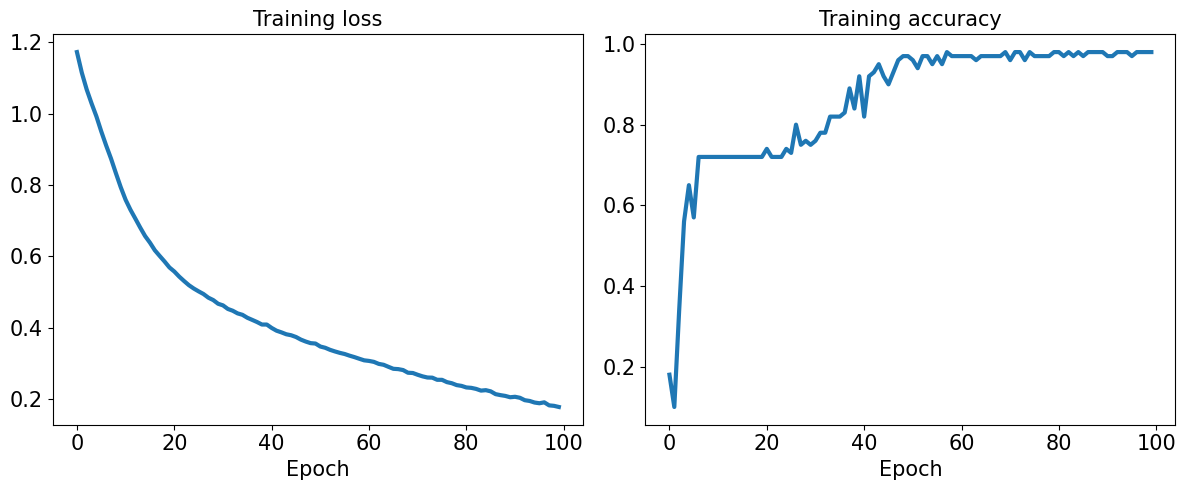

In [20]:
hist = history.history
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.show()

In [21]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)
print('Test loss: {:.4f} Test Acc.: {:.4f}'.format(*results))

Test loss: 0.1876 Test Acc.: 0.9800


In [22]:
# 모델 저장
iris_model.save('iris-classifier.h5', 
                overwrite=True,
                include_optimizer=True,
                save_format='h5')

In [24]:
iris_model_new = tf.keras.models.load_model('iris-classifier.h5')

results = iris_model_new.evaluate(ds_test.batch(50), verbose=0)
print('Test loss: {:.4f} Test Acc.: {:.4f}'.format(*results))

Test loss: 0.1876 Test Acc.: 0.9800
